# MNIST DATASET IMAGE RECOGNITION
## SCIKIT LEARN IMPLEMENTATION

#### Ryan McMillan November 2019

### Imports

In [6]:
# Import datasets to get access to the MNIST dataset, Metrics to get confusion matrix and classification report, SVM is the model (support vector machine)
from sklearn import datasets, metrics, svm
# Import matplotlib.pyplot to visualise the digits
import matplotlib.pyplot as plt

In [4]:
#initialise the digits variable with the datasets.load_digits function
digits = datasets.load_digits()

### Exploring the data

In [16]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [18]:
len(digits['data'])

1797

#### About digits
datasets.load_digits() returns a dictionary containing four array keys: 'data', 'target', 'target_names', and 'images'. a description key ('DESCR') is also returned containing a paragraph about the data.

Images are 8x8 pixels

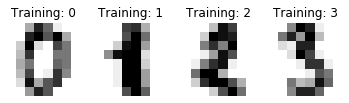

In [5]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [19]:
n_samples = len(digits.images)
print(n_samples)

1797


In [9]:
data = digits.images.reshape((n_samples, -1))

In [10]:
classifier = svm.SVC(gamma=0.0001)

In [12]:
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

In [14]:
print(f"Classification report for classifier {classifier}\n{metrics.classification_report(expected, predicted)}")
print(f"Confusion Matrix:\n{metrics.confusion_matrix(expected, predicted)}")

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.95      0.90      0.93        91
           2       1.00      0.94      0.97        86
           3       0.95      0.87      0.91        91
           4       0.99      0.95      0.97        92
           5       0.90      0.96      0.93        91
           6       0.99      0.99      0.99        91
           7       0.92      0.98      0.95        89
           8       0.92      0.89      0.90        88
           9       0.83      0.95      0.88        92

    accuracy                           0.94       899
   macro avg       0.94      0.94      0.94       899
weighted avg       0.94     

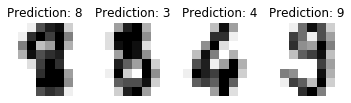

In [15]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()